# Extending a cytosim simulation
Requires Python>=3.7  
Before running, copy or move the cytosim module (cytosim.---.so) to the current folder.

Here we showcase by adding motors to an existing fiber simulation.

In [1]:
import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# just a code to plot the simulation
def plot_sim(sim):
    frame = sim.frame()
    space = sim.spaces[0]
    plt.figure()
    r = np.linspace(0,2.0*np.pi,100)
    plt.plot(5.0* np.cos(r),5.0*np.sin(r),color="black")
    for fiber in frame["filament"]:
        p = fiber.points()
        plt.plot(p[:,0],p[:,1],color="green")
        plt.scatter(p[0,0],p[0,1],color="green")
    if "stem" in frame.keys():
        for fiber in frame["stem"]:
            p = fiber.points()
            plt.plot(p[:,0],p[:,1],color="blue")
    pos2 = np.array([c.position() for c in sim.couples if c.state()==3])
    pos1 = np.array([c.position() for c in sim.couples if c.state()==1 or c.state()==2])
    if pos2.size>0:
        plt.scatter(pos2[:,0],pos2[:,1],color="red")
    if pos1.size>0:
        plt.scatter(pos1[:,0],pos1[:,1],color="magenta")
    plt.axis('equal')
    plt.show()

## Fiber simulation
Here we simulate and a fiber. The point corresponds to the minus end.

In [3]:
sim = cytosim.start("cym/fiber.cym")

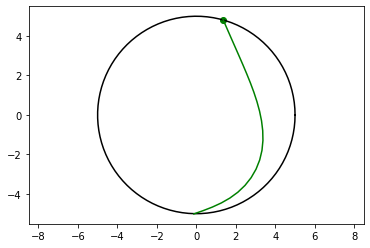

In [4]:
sim.run(10)
plot_sim(sim)

### Adding already defined objects

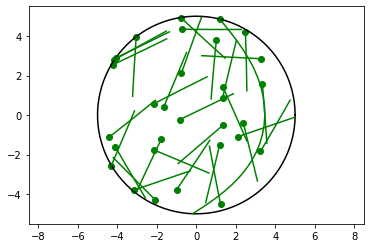

In [5]:
sim.add("filament","length = 3",30)
sim.run(20)
plot_sim(sim)

### Constructing complex objects
Here we are making divalent crosslinkers, with each head aving a favorite orientation towards the membrane. The two motor heads are separated by a short stem.

A motor head is a couple. One hand ("binder") is bound to the stem and cannot detach ; the other hand ("catcher") may attach and detach.

In [6]:
# Defining binder
binder_props = " binding = 10, 0.05 ; unbinding = 0, 0 ;"
sim.set("hand","binder",binder_props)
# Dsefining catcher
catcher_props = " binding = 80, 0.08 ; unbinding = 0.5, 0.5 ;"
sim.set("hand","catcher",catcher_props)
# Defining the head
head_props = "flip = 0 ; hand1 = binder ; hand2 = catcher ; diffusion = 0 ; \
    stiffness = 1000; torque = 100, 0.5234; activity = fork"
sim.set("couple","head",head_props)
# Defining stem
stem_props = "rigidity = 100 ; segmentation = 0.5 ; confine = inside, 200, cell"
sim.set("fiber","stem",stem_props);

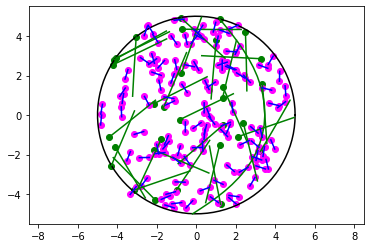

In [7]:
# Creating 100 stems
stems = sim.add("stem","length = 0.5",100)
# To each stem, we attach a head at each end, by the binder hand (hand 0)
for stem in stems:
    f = [ cytosim.Couple.toCouple(c) for c in sim.add("head","",2)]
    f[0][0].attachEnd(stem,1)
    f[1][0].attachEnd(stem,2)
plot_sim(sim)

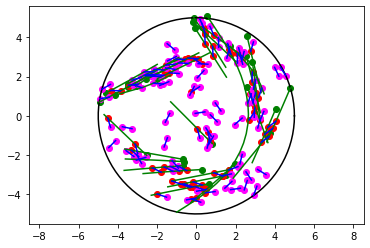

In [8]:
sim.run(900)
plot_sim(sim)